In [79]:
from skimage import util, color, morphology, filters, io, exposure
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1 Diberikan citra “carrot.jpg” yang direpresentasikan dalam color space CMY

### 1a. Konversikan citra ini ke dalam color space RGB, lalu tampilkan hasil smoothing terhadap masing-masing channel dengan kernel 4x4

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


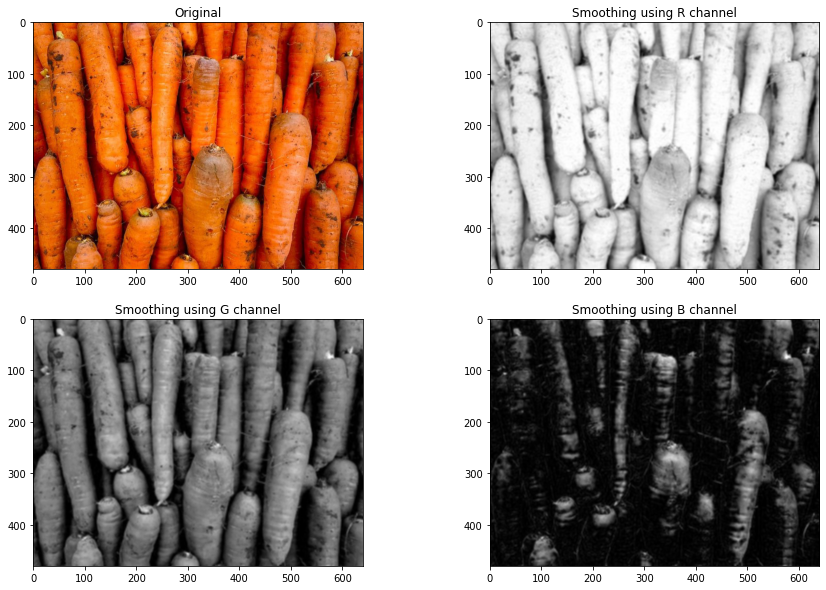

In [80]:
carrot = io.imread('carrot.jpg')
C = carrot[:,:,0]
M = carrot[:,:,1]
Y = carrot[:,:,2]

R = 1 - util.img_as_float(C)
G = 1 - util.img_as_float(M)
B = 1 - util.img_as_float(Y)

RGB = np.zeros(carrot.shape)

RGB[:,:,0] = R
RGB[:,:,1] = G
RGB[:,:,2] = B

R_smooth = filters.rank.mean(R, selem=morphology.square(4))
G_smooth = filters.rank.mean(G, selem=morphology.square(4))
B_smooth = filters.rank.mean(B, selem=morphology.square(4))


#Display result
plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.imshow(RGB); plt.title('Original')
plt.subplot(2,2,2); plt.imshow(R_smooth, cmap=plt.cm.gray); plt.title('Smoothing using R channel')
plt.subplot(2,2,3); plt.imshow(G_smooth, cmap=plt.cm.gray); plt.title('Smoothing using G channel')
plt.subplot(2,2,4); plt.imshow(B_smooth, cmap=plt.cm.gray); plt.title('Smoothing using B channel')

plt.show()



### 1b Konversikan citra ini ke dalam color space RGB, lalu tampilkan hasil smoothing terhadap masing-masing channel dengan kernel 16x16.


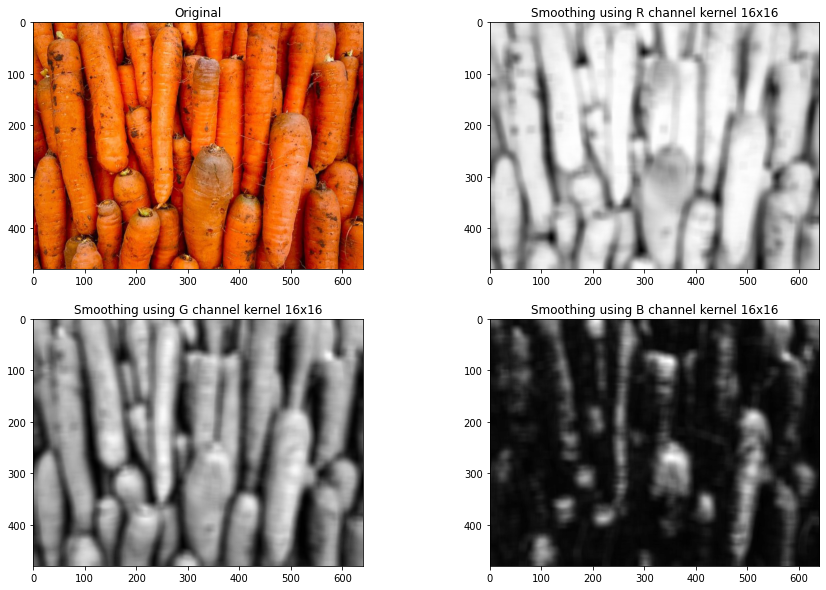

In [81]:
R_smooth_16 = filters.rank.mean(R, selem=morphology.square(16))
G_smooth_16 = filters.rank.mean(G, selem=morphology.square(16))
B_smooth_16 = filters.rank.mean(B, selem=morphology.square(16))


#Display result
plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.imshow(RGB); plt.title('Original')
plt.subplot(2,2,2); plt.imshow(R_smooth_16, cmap=plt.cm.gray); plt.title('Smoothing using R channel kernel 16x16')
plt.subplot(2,2,3); plt.imshow(G_smooth_16, cmap=plt.cm.gray); plt.title('Smoothing using G channel kernel 16x16')
plt.subplot(2,2,4); plt.imshow(B_smooth_16, cmap=plt.cm.gray); plt.title('Smoothing using B channel kernel 16x16')

plt.show()

### 1c Gabungkan masing-masing channel pada poin a dan b, kemudian bandingkan hasil citranya. Jelaskan hasil yang anda peroleh.

> Berdasarkan hasil penggabungan channel-channel yang telah di-smoothing pada nomor sebelumnya, terlihat bahwa smoothing pada kernel 4x4 lebih baik jika dibandingkan dengan smoothing menggunakan kernel 16x16. Kernel 16x16 memberikan output yang terlalu smooth sehingga citra menjadi blur.

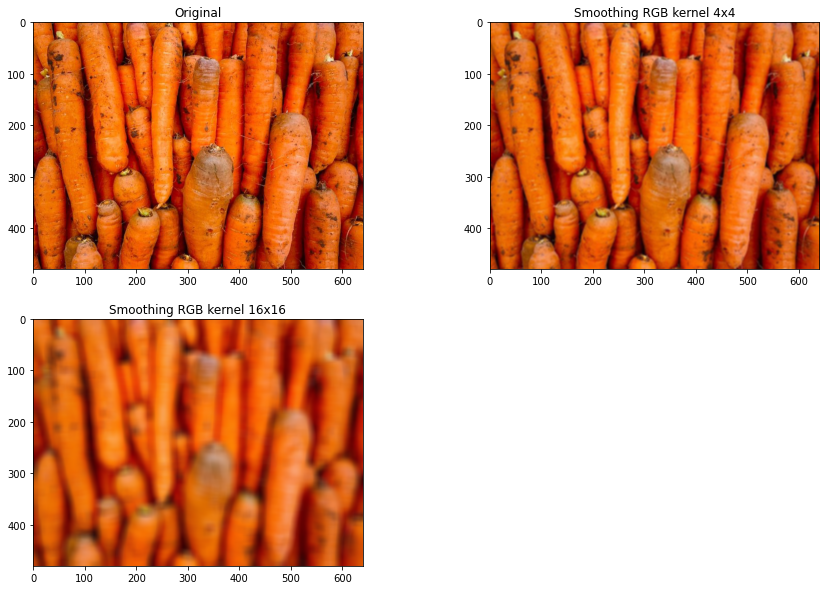

In [82]:
# RGB kernel 4x4
RGB4 = np.zeros(carrot.shape)
RGB4[:,:,0] = R_smooth
RGB4[:,:,1] = G_smooth
RGB4[:,:,2] = B_smooth

# RGB kernel 16x16
RGB16 = np.zeros(carrot.shape)
RGB16[:,:,0] = R_smooth_16
RGB16[:,:,1] = G_smooth_16
RGB16[:,:,2] = B_smooth_16

# Display result
plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.imshow(RGB); plt.title('Original')
plt.subplot(2,2,2); plt.imshow(RGB4.astype(np.uint8), cmap=plt.cm.gray); plt.title('Smoothing RGB kernel 4x4')
plt.subplot(2,2,3); plt.imshow(RGB16.astype(np.uint8), cmap=plt.cm.gray); plt.title('Smoothing RGB kernel 16x16')

plt.show()

### 1d Lakukan clustering pada citra awal menggunakan metode k-mean clustering dengan k = 2.


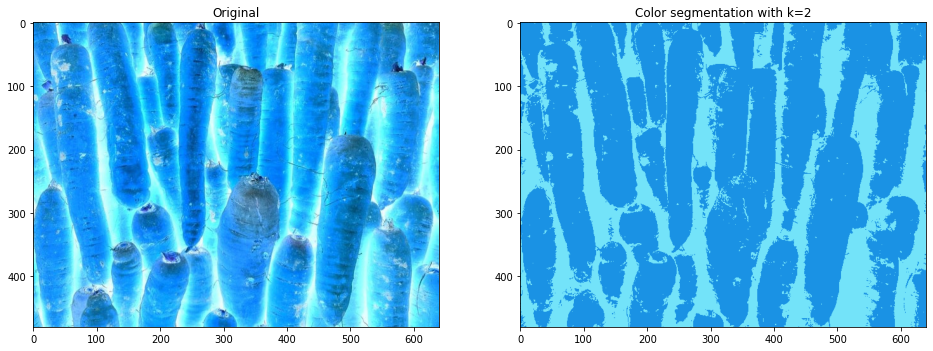

In [83]:
carrot_img = cv2.imread("carrot.jpg")
carrot_img = cv2.cvtColor(carrot_img, cv2.COLOR_BGR2RGB)
pixel_values = carrot_img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(carrot_img.shape)

#Show images
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1); plt.imshow(carrot_img)
plt.title("Original")
plt.subplot(1,2,2); plt.imshow(segmented_image)
plt.title("Color segmentation with k=2")
plt.show()


### 1e Lakukan clustering pada citra awal menggunakan metode k-mean clustering dengan k = 5.

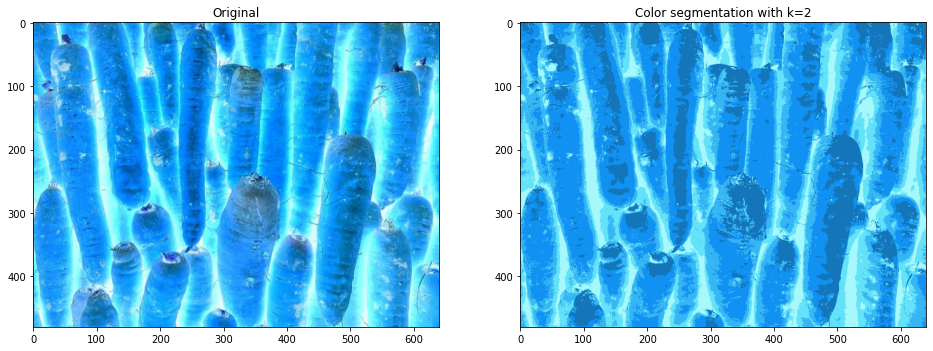

In [84]:
carrot_img = cv2.imread("carrot.jpg")
carrot_img = cv2.cvtColor(carrot_img, cv2.COLOR_BGR2RGB)
pixel_values = carrot_img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(carrot_img.shape)

#Show images
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1); plt.imshow(carrot_img)
plt.title("Original")
plt.subplot(1,2,2); plt.imshow(segmented_image)
plt.title("Color segmentation with k=2")
plt.show()

### 1f Ceritakan perbedaan yang kamu dapatkan pada poin d dan e. Nilai k manakah yang lebih baik untuk segmentasi gambar tersebut? Jelaskan alasan di balik jawaban anda!

> Berdasarkan hasil clustering di atas, K-mean dengan k=5 memiliki hasil segmentasi yang lebih baik dibandingkan dengan k=2. Nilai k menentukan banyaknya cluster yang akan dibentuk oleh algoritma k-mean. Dalam kasus ini, k-mean dengan k=5 lebih baik karena dapat melakukan segmentasi secara lebih detail untuk setiap piksel dengan warna-warna yang memiliki kemiripan.

> 

# 2 Diberikan citra “bird-house.jpg”.

### 2a Terapkan sharpening pada gambar tersebut untuk ketiga channel R, G, dan B

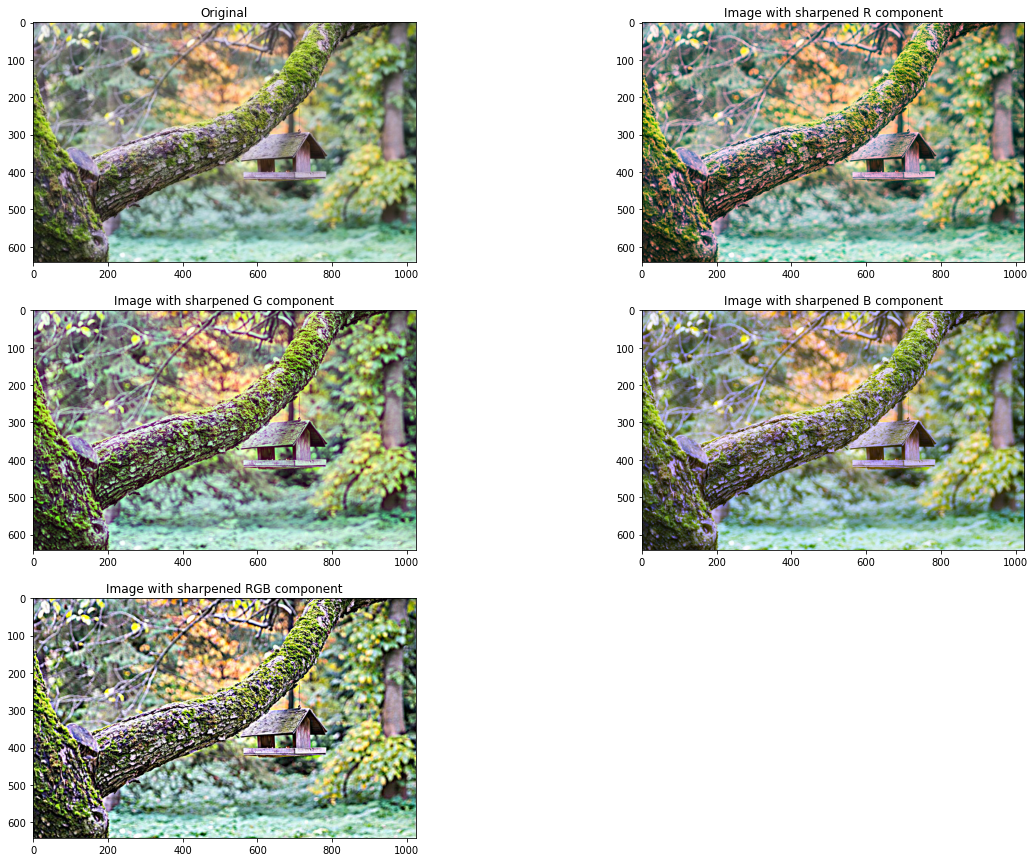

In [85]:
bird_house = io.imread('bird-house.jpg')

# Channel segmentation
R = bird_house[:,:,0]
G = bird_house[:,:,1]
B = bird_house[:,:,2]

# Sharpening
R2 = util.img_as_ubyte(filters.unsharp_mask(R, radius=5,
amount=2))
G2 = util.img_as_ubyte(filters.unsharp_mask(G, radius=5,
amount=2))
B2 = util.img_as_ubyte(filters.unsharp_mask(B, radius=5,
amount=2))

RGB2 = util.img_as_ubyte(np.zeros(bird_house.shape))
RGB2[:,:,0] = R
RGB2[:,:,1] = G2
RGB2[:,:,2] = B

RGB3 = util.img_as_ubyte(np.zeros(bird_house.shape))
RGB3[:,:,0] = R2
RGB3[:,:,1] = G
RGB3[:,:,2] = B

RGB4 = util.img_as_ubyte(np.zeros(bird_house.shape))
RGB4[:,:,0] = R
RGB4[:,:,1] = G
RGB4[:,:,2] = B2

RGB_ALL = util.img_as_ubyte(np.zeros(bird_house.shape))
RGB_ALL[:,:,0] = R2
RGB_ALL[:,:,1] = G2
RGB_ALL[:,:,2] = B2

plt.figure(figsize=(20, 15))
plt.subplot(3,2,1); plt.imshow(bird_house); plt.title("Original")
plt.subplot(3,2,2); plt.imshow(RGB3); plt.title("Image with sharpened R component")
plt.subplot(3,2,3); plt.imshow(RGB2); plt.title("Image with sharpened G component")
plt.subplot(3,2,4); plt.imshow(RGB4); plt.title("Image with sharpened B component")
plt.subplot(3,2,5); plt.imshow(RGB_ALL); plt.title("Image with sharpened RGB component")

plt.show()

### 2b Terapkan contrast stretching terhadap channel R, G, dan B lalu tampilkan hasilnya sebagai satu citra! Jelaskan hasil citra yang anda peroleh

In [86]:
def img_to_hist(img, ranges=256):
  return util.img_as_ubyte(img).flatten()

def contrast_stretching(img):
  mn = min(img.flatten())
  mx = max(img.flatten())
  b = int(np.floor(255 / (mx - mn)))
  return (img - mn) * b


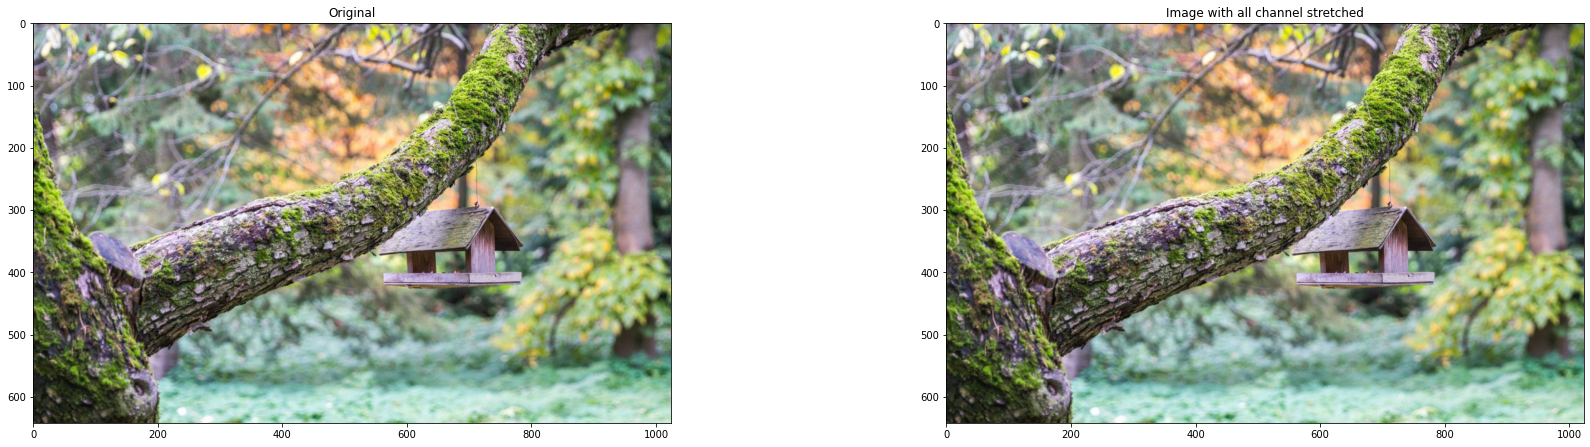

In [87]:
#Contrast stretching
R_stretched = contrast_stretching(R)
G_stretched = contrast_stretching(G)
B_stretched = contrast_stretching(B)

RGB_stretched = util.img_as_ubyte(np.zeros(bird_house.shape))
RGB_stretched[:,:,0] = R_stretched
RGB_stretched[:,:,1] = G_stretched
RGB_stretched[:,:,2] = B_stretched

# Display stretching result
plt.figure(figsize=(30, 25))
plt.subplot(3,2,1); plt.imshow(bird_house); plt.title("Original")
plt.subplot(3,2,2); plt.imshow(RGB_stretched); plt.title("Image with all channel stretched")
plt.show()

### 2c Lakukan konversi gambar bird.jpg tersebut menjadi bentuk citra HSV! Terapkan sharpening pada gambar tersebut pada channel V. Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.


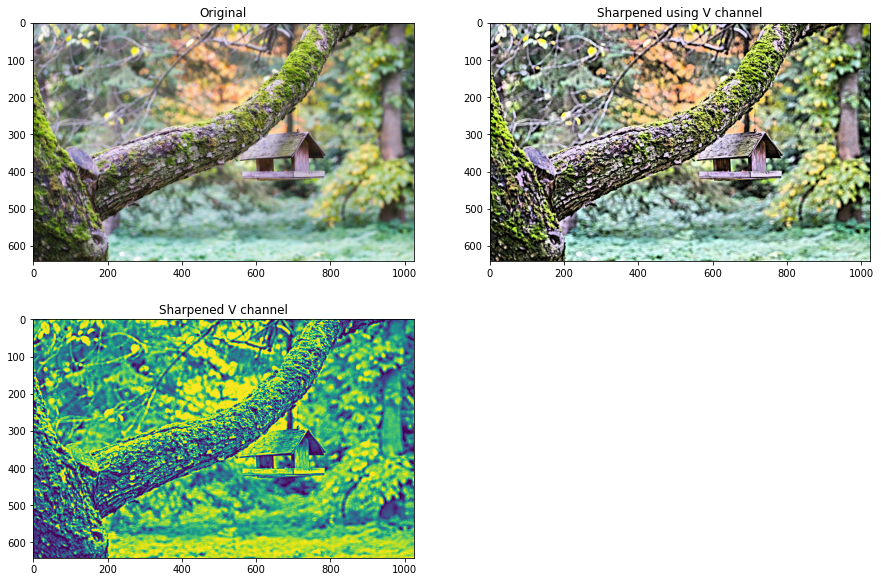

In [96]:
HSV = color.rgb2hsv(bird_house)
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

V2 = util.img_as_ubyte(filters.unsharp_mask(V, radius=5, amount=2))
HSV[:,:,2] = V2

hsv_to_rgb_sharpened = color.hsv2rgb(HSV)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.imshow(bird_house); plt.title('Original')
plt.subplot(2,2,2); plt.imshow(hsv_to_rgb_sharpened.astype(np.uint8)); plt.title('Sharpened using V channel')
plt.subplot(2,2,3); plt.imshow(V2); plt.title('Sharpened V channel')
plt.show()

### 2d Terapkan contrast stretching terhadap channel V lalu tampilkan hasilnya sebagai satu citra! Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.


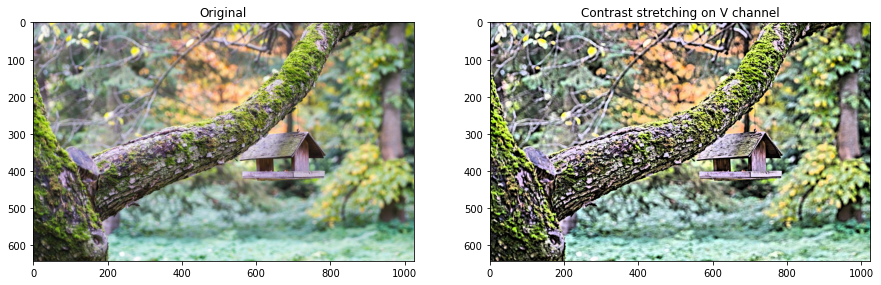

In [89]:
HSV[:,:,2] = contrast_stretching(V)

hsv_to_rgb_stretched = color.hsv2rgb(HSV)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1); plt.imshow(bird_house); plt.title('Original')
plt.subplot(2,2,2); plt.imshow(hsv_to_rgb_stretched.astype(np.uint8)); plt.title('Contrast stretching on V channel')
plt.show()

### 2e Ceritakan perbedaan dari citra awal, citra hasil sharpening, dan hasil contrast stretching pada channel RGB dan channel V (gunakan histogram untuk mendukung penjelasan dan argumen anda)

> Citra awal sebelum sharpening terlihat kurang detail untuk beberapa bagian edge dari objek dalam citre tersebut. Edge yang kurang detail di antaranya adalah bagian kulit batang kayu dan edge pada bird house. Setelah dilakukan sharpening pada semua channel RGB terdapat peningkatan pada ketajaman citra yaitu edges dari bird house menjadi sedikit lebih tegas dan juga bagian-bagian yang merekah pada batang kayu terlihat sedikit lebih detail dari sebelumnya. Sharpeing menggunakan V channel saja juga memberikan output yang cukup mirip dengan RGB pada semua channel.

> Kontras dari citra awal jika diperhatikan masih kurang baik, namun tidak terlalu buruk berdasarkan hasil plot histogram. Contrast stretching menggunakan RGB channel tidak memberikan perubahan yang signifikan. Selanjutnya, contrast stretching menggunakan V channel pada model HSV memberikan hasil yang lebih baik jika dibandingkan dengan RGB model. Hal ini dapat diperhatikan pada histogram hasil stretching menggunakan channel V.

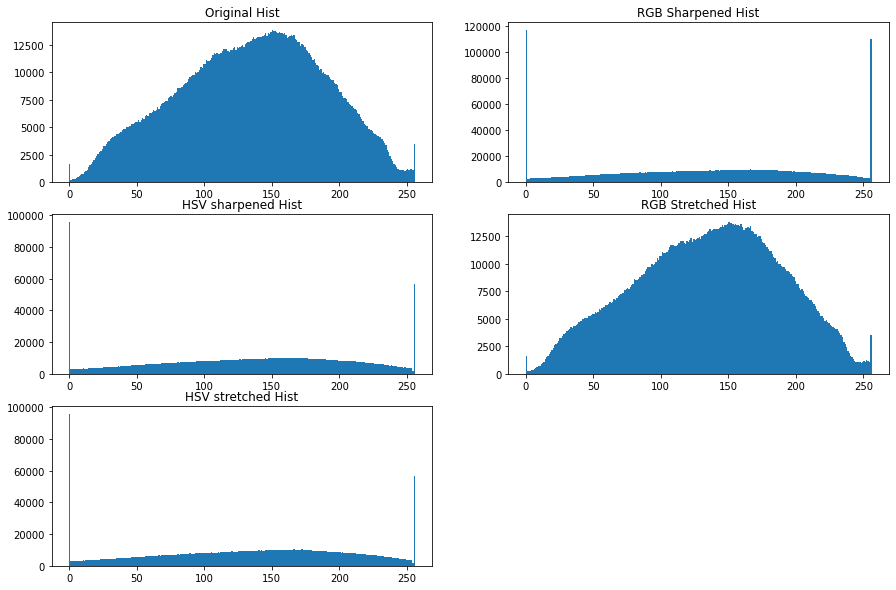

In [94]:
# Display Historgram
# Sharpening section
plt.figure(figsize=(15,10))
plt.subplot(3,2,1); plt.hist(img_to_hist(bird_house), 256, range = (0, 256)); plt.title('Original Hist')
plt.subplot(3,2,2); plt.hist(img_to_hist(RGB_ALL), 256, range = (0, 256)); plt.title('RGB Sharpened Hist')
plt.subplot(3,2,3); plt.hist(img_to_hist(hsv_to_rgb_sharpened.astype(np.uint8)), 256, range = (0, 256)); plt.title('HSV sharpened Hist')

# Contrast stretching
plt.subplot(3,2,4); plt.hist(img_to_hist(RGB_stretched), 256, range = (0, 256)); plt.title('RGB Stretched Hist')
plt.subplot(3,2,5); plt.hist(img_to_hist(hsv_to_rgb_stretched.astype(np.uint8)), 256, range = (0, 256)); plt.title('HSV stretched Hist')

plt.show()

